# Data Setup

## Packages

In [ ]:
# notebook install
# ! pip install umap-learn

# local
pip install umap-learn

# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# scikit
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN

# umap
from umap import UMAP

## Tools

### Fill drop function


In [ ]:
def fillndrop(x,parameter,df,manual=None):
    """input is a list of column title, and if you want the mean, mode, or drop. 
    After replacing columns with nulls, function will drop remaining values
    """
    if parameter == 'mode':
        for i in x:
            df[i] = df[i].fillna(df[i].mode()[0])
    if parameter == 'mean':
        for i in x:
            df[i] = df[i].fillna(df[i].mean())
    if parameter == 'drop':
        for i in x:
            if i in df:
                df.drop(i,axis=1,inplace=True)
                
    if parameter == 'manual':
        for i in x:
            df[i] = df[i].fillna(manual)

### explained variance bar plot function


In [ ]:
# quick function to construct the barplot easily
def ev_plot(ev):
  y = list(ev)
  x = list(range(1,len(ev)+1))
  return x, y

# Data Exploration

## Description & Info

In [ ]:
csv = pd.read_csv("stock-fundamentals.csv")
stonks_all = pd.DataFrame(csv)

In [ ]:
stonks = stonks_all.set_index("ticker")

In [ ]:
stonks.info()

In [ ]:
stonks.head().T

In [ ]:
stonks.describe().T

## Null Values


In [ ]:
nulls = stonks.isnull().sum().sort_values(ascending=False).to_frame()
nulls = nulls[nulls[0] != 0]
nulls

,0
Quarter end,755
P/E ratio,139
Current Assets,122
Current Liabilities,122
Current ratio,122
Net margin,103
Dividend payout ratio,102
P/B ratio,84
ROE,63
Equity to assets ratio,43


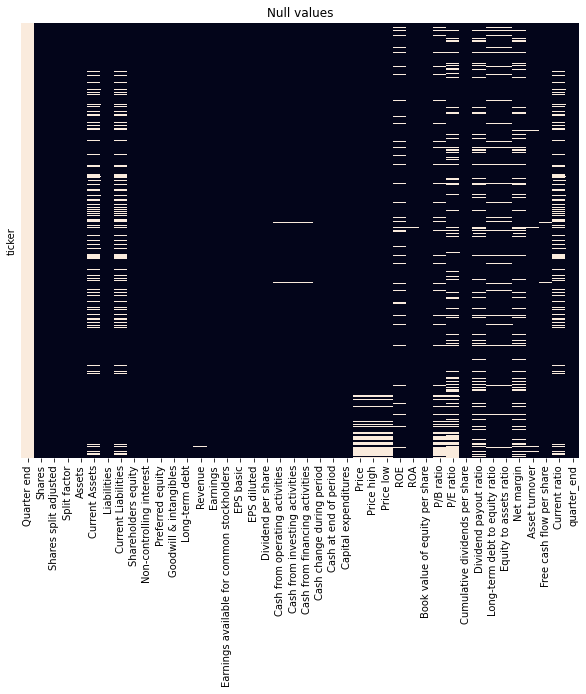

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Null values")
sns.heatmap(stonks.isnull(),yticklabels=False,cbar=False)
plt.show()

## Data Visualization

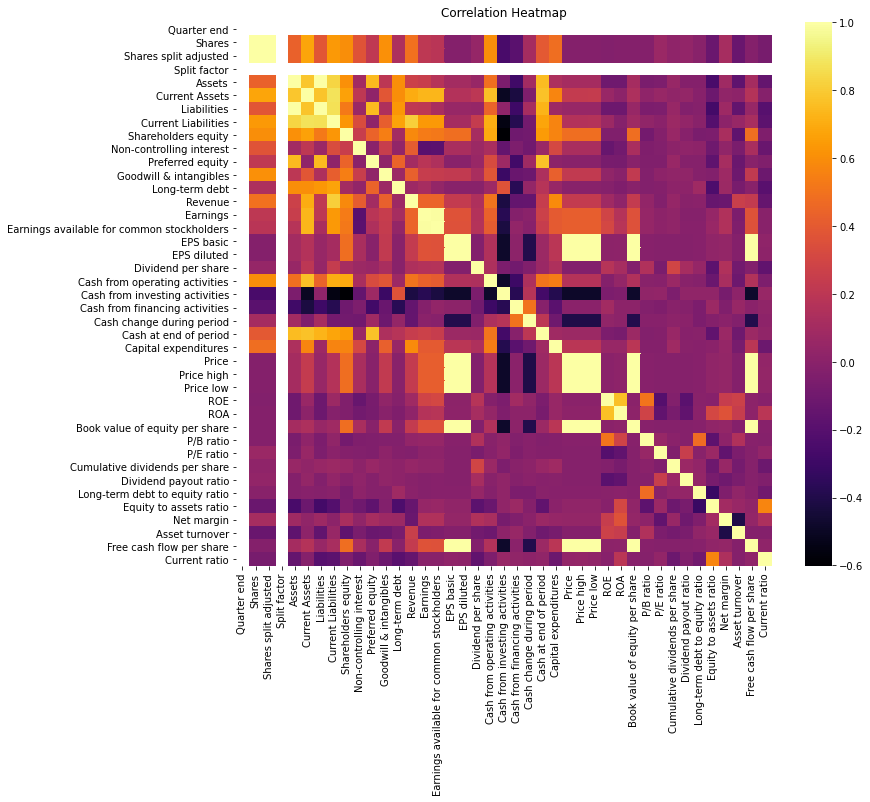

In [ ]:
stonks_corr = stonks.select_dtypes("number").corr()
plt.figure(figsize=(12, 10))
plt.title("Correlation Heatmap")
sns.heatmap(stonks_corr, cmap="inferno")
plt.show()

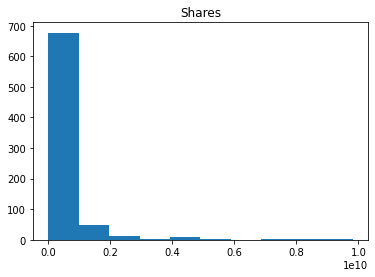

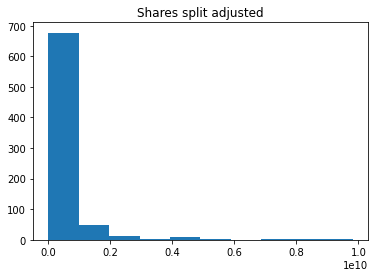

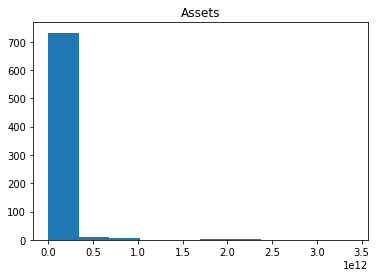

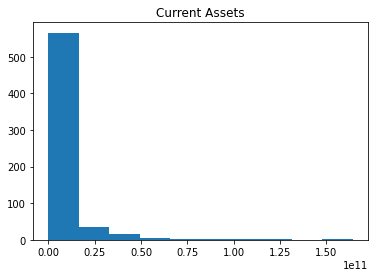

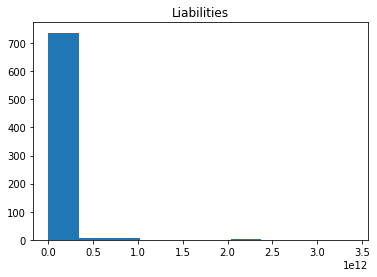

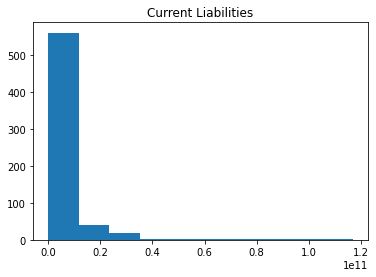

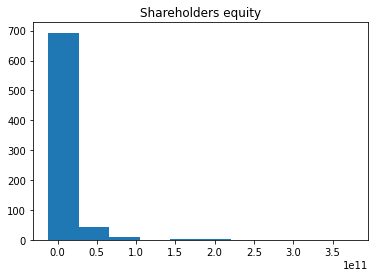

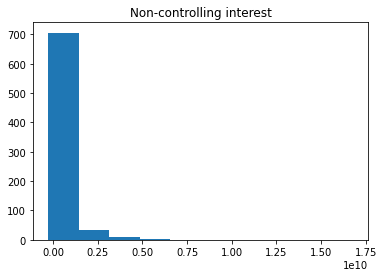

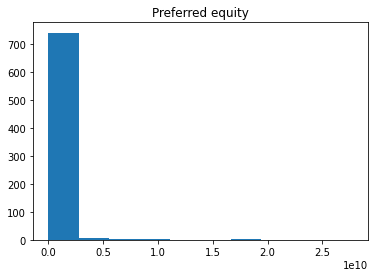

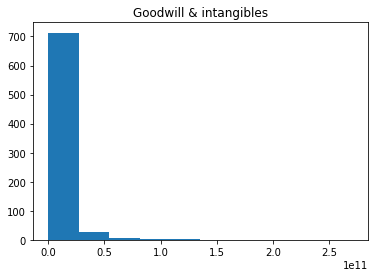

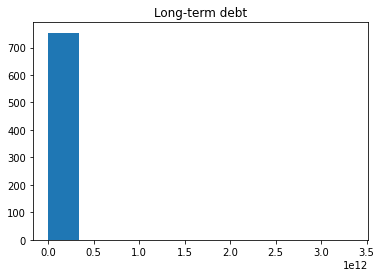

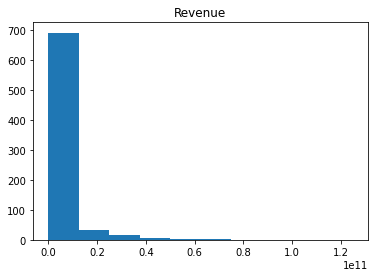

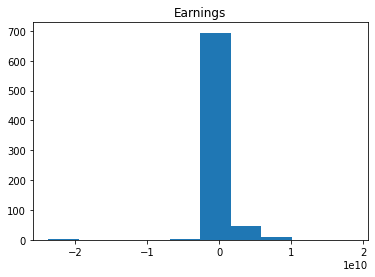

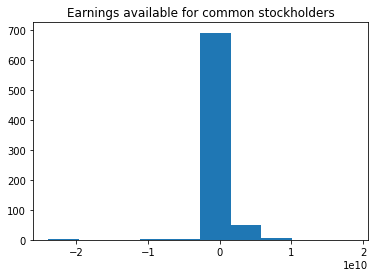

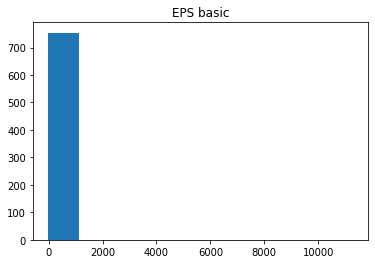

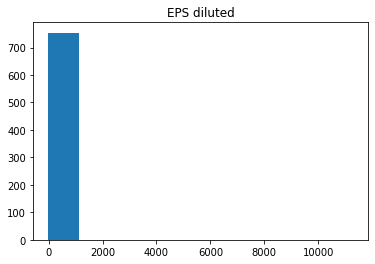

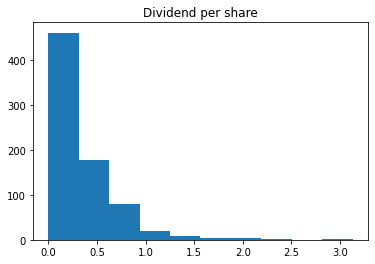

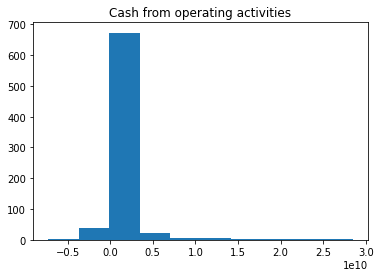

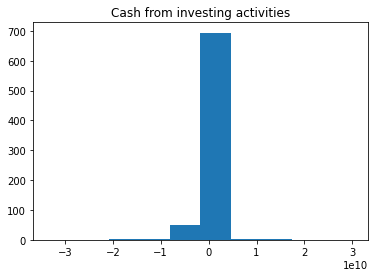

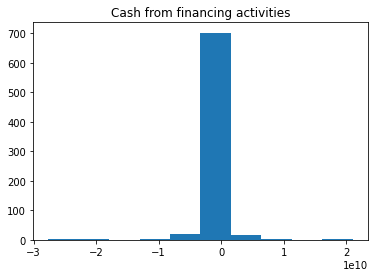

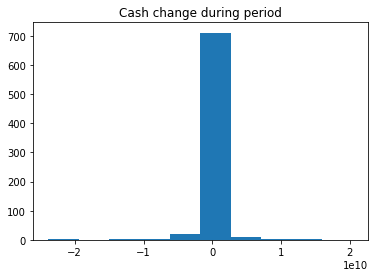

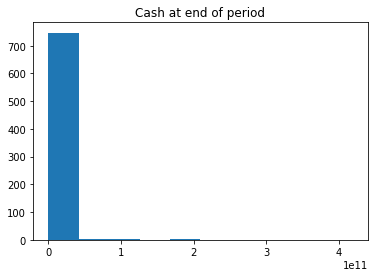

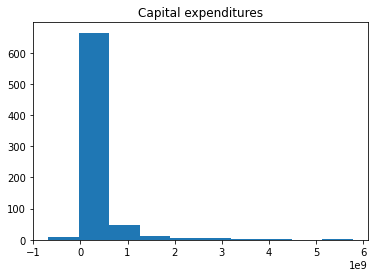

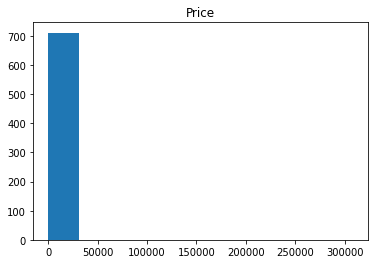

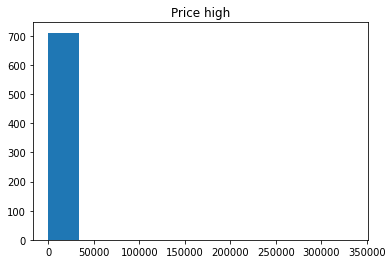

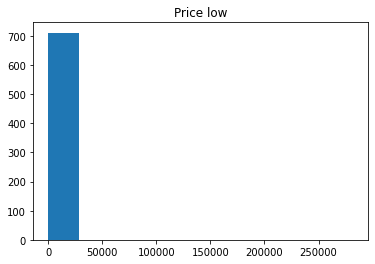

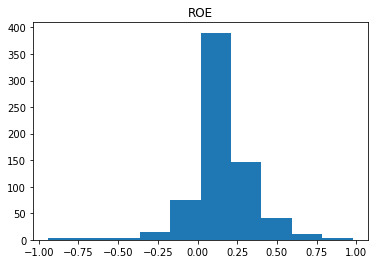

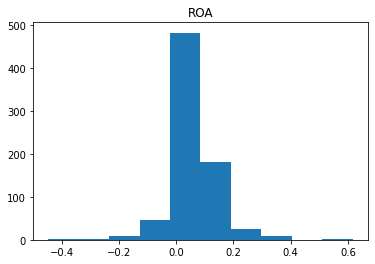

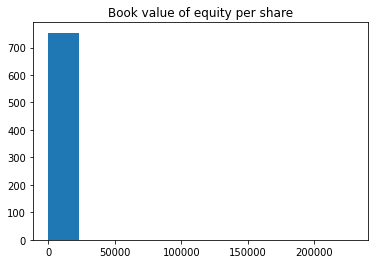

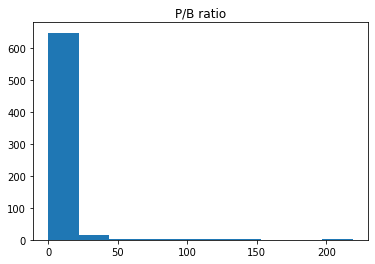

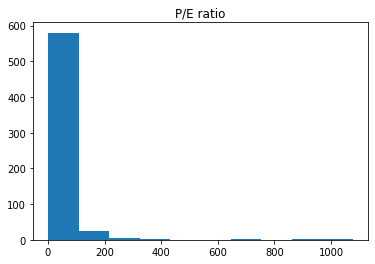

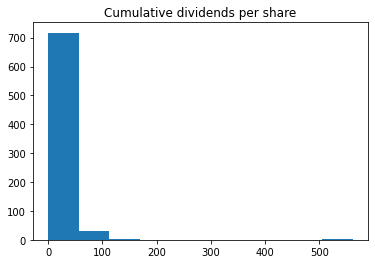

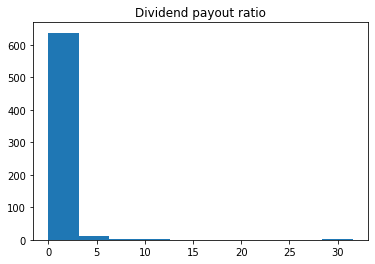

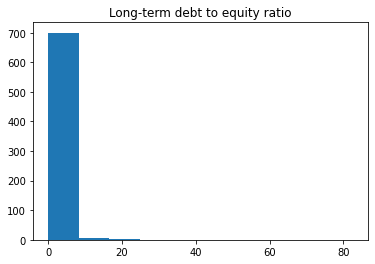

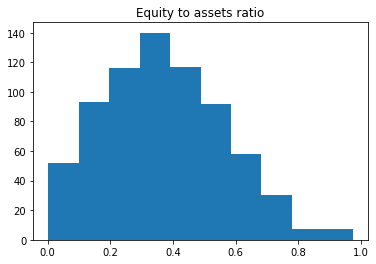

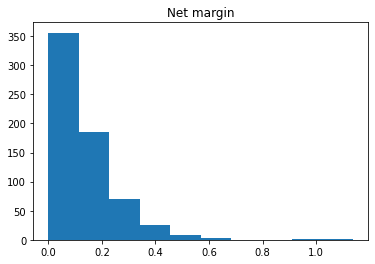

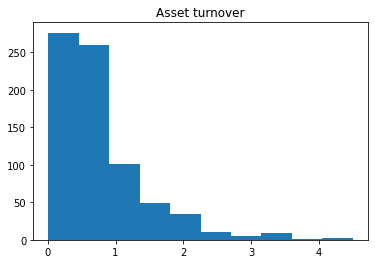

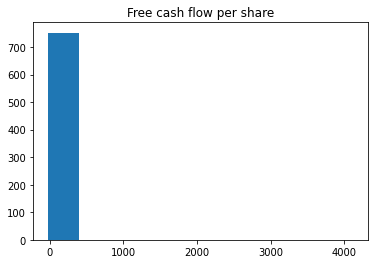

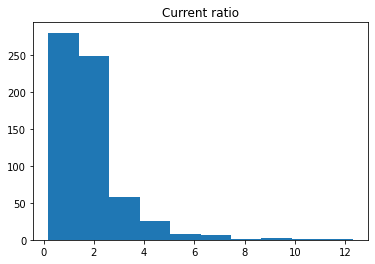

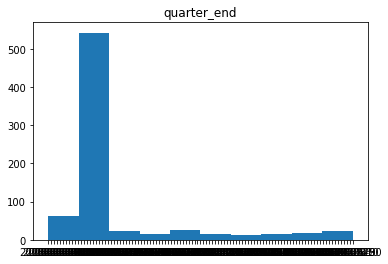

In [ ]:
for column in stonks.drop(['Quarter end','Split factor'], axis=1):
    plt.hist(stonks[column])
    plt.title(column)
    plt.show()

# Data Preparation

## Feature Engineering

In [ ]:
stonks['quarter_end_month'] = stonks['quarter_end'].apply(lambda x: x[5:7])
stonks['P/S ratio'] = stonks['Shares']*stonks['Price'] / stonks['Revenue']

## Data Cleaning

In [ ]:
nulls = stonks.isnull().sum().sort_values(ascending=False).to_frame()
nulls = nulls[nulls[0] != 0]
# nulls
# nulls.index.to_list()

['Quarter end',
 'P/E ratio',
 'Current Assets',
 'Current Liabilities',
 'Current ratio',
 'Net margin',
 'Dividend payout ratio',
 'P/B ratio',
 'ROE',
 'Equity to assets ratio',
 'Long-term debt to equity ratio',
 'Price low',
 'Price high',
 'Price',
 'Asset turnover',
 'Revenue',
 'Cash from financing activities',
 'Cash from operating activities',
 'Cash from investing activities',
 'Free cash flow per share',
 'ROA']

In [ ]:
# # quick data analyis functions
# stonks[""].unique()
# stonks[""].value_counts()

In [ ]:
# mean fill
fillndrop(['ROA', # 1 Nulls
           'Free cash flow per share', # 2 Nulls
           'Cash from operating activities', # 2 Nulls
           'Cash from investing activities', # 2 Nulls
           'Cash from financing activities', # 2 Nulls
           'Revenue', # 3 Nulls
           'Asset turnover', # 7 Nulls
           'Price low', # 43 Nulls
           'Price high', # 43 Nulls
           'Price', # 43 Nulls
           'Equity to assets ratio', # 43 Nulls
           'P/S ratio', # 43 nulls
           'Long-term debt to equity ratio', # had 75 values equal to 0
           'P/B ratio', # 84 Nulls
           'ROE', # 63 Nulls
           'P/E ratio', # 139 Nulls
           'Current ratio', # 122 Nulls
           'Current Assets', # 122 Nulls
           'Current Liabilities', # 122 Nulls
           'Net margin', # 103 Nulls
           'Dividend payout ratio', # 102 Nulls
           ],'mean',stonks)

In [ ]:
# drop variable
fillndrop(['Quarter end', # 755 Nulls
           'Split factor', # 755 value of 1
           'quarter_end' # Feature Engineering
           ],'drop',stonks)

In [ ]:
# Dropping Berkshire Hathaway Inc. Class A stock because it is an extreme outlier
stonks.drop('BRK', axis = 0, inplace=True)

## Data Scaling


In [ ]:
stonks_num = stonks.select_dtypes("number")

scaled = StandardScaler()
stonks_scaled = scaled.fit_transform(stonks_num)

# Data Modeling

### K Means

In [ ]:
# top metrics for stocks based on investors https://www.fool.com/investing/2018/03/21/9-essential-metrics-all-smart-investors-should-kno.aspx
top_col = [
           'ROE',
           'P/E ratio',
           'P/B ratio',
           'P/S ratio',
           'Free cash flow per share',
           'Dividend payout ratio',
           'Long-term debt to equity ratio',
        ]

stonks_top = stonks_num.loc[:,top_col]
top_scaled = scaled.fit_transform(stonks_top)

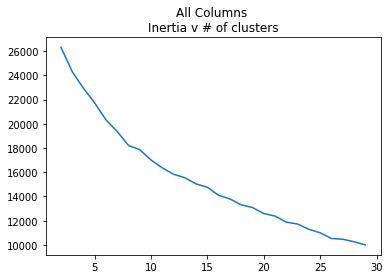

In [ ]:
ss= []
for k in range(2,30):
    km = KMeans(n_clusters=k)
    lab_sc = km.fit_predict(stonks_scaled)
    ss.append(km.inertia_)

plt.title("All Columns \nInertia v # of clusters")
sns.lineplot(x=range(2,30), y=ss)
plt.show()


In [ ]:
# k =KMeans(7)
# k_pred = k.fit_predict(stonks_scaled)
# stonks["k"] =k_pred
# k_centers = k.cluster_centers_

### PCA

In [ ]:
pca = PCA()
pcs = pca.fit_transform(stonks_scaled)
# pcs = pca.fit_transform(top_scaled)

(754, 17)

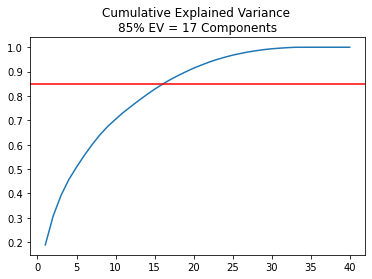

In [ ]:
# explained variance

varexp = pca.explained_variance_ratio_
# sns.lineplot(range(1, len(varexp)+1), varexp)

# cumulative explained  variance

plt.title("Cumulative Explained Variance \n85% EV = 17 Components")
plt.plot(range(1, len(varexp)+1), np.cumsum(varexp))
plt.axhline(.85, color="red")
plt.show()


pca_85 = PCA(.85)
pcs_85 = pca_tsne.fit_transform(stonks_scaled)

# Number of (observation, components)
pcs_85.shape


In [ ]:
x, y = ev_plot(pca.explained_variance_)
sns.barplot(x, y)
plt.show()

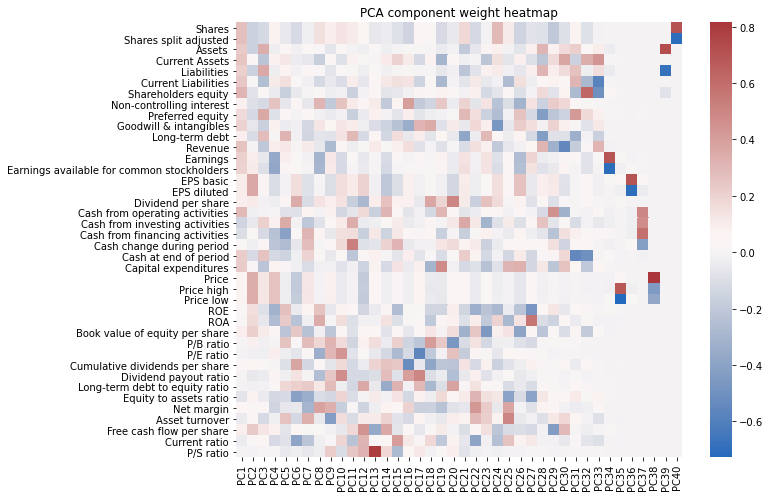

In [ ]:
comps = pca.components_

cols = ["PC" + str(i) for i in range(1, len(comps)+1)]
loadings = pd.DataFrame(comps.T, columns=cols, index=stonks_num.columns)
# loadings

plt.figure(figsize=(10, 8))
plt.title("PCA component weight heatmap")
sns.heatmap(loadings, cmap="vlag")
plt.show()

In [ ]:
pc2 = PCA(2, svd_solver = "full")
stonks_pc2 = pc2.fit_transform(stonks_scaled)

np.sum(pc2.explained_variance_ratio_)


0.3062642035299095

In [ ]:
stonks[['pc2_1','pc2_2']] = stonks_pc2

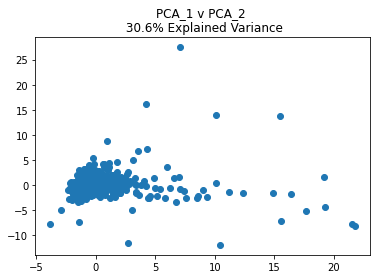

In [ ]:
plt.title("""PCA_1 v PCA_2 \n 30.6% Explained Variance""")
plt.scatter (x=stonks.pc2_1, y=stonks.pc2_2)
plt.show()

## UMAP

In [ ]:
u = UMAP(
         n_neighbors= 5,
         min_dist=.3, random_state=820)
ue = u.fit_transform(stonks_top)

umap_df = pd.DataFrame(ue,columns=['x','y'])

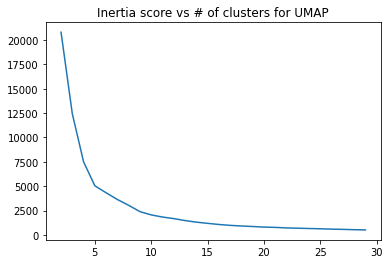

In [ ]:
ss= []
for k in range(2,30):
    km = KMeans(n_clusters=k)
    lab_sc = km.fit_predict(umap_df)
    ss.append(km.inertia_)

plt.title("Inertia score vs # of clusters for UMAP")
sns.lineplot(x=range(2,30), y=ss)
plt.show()

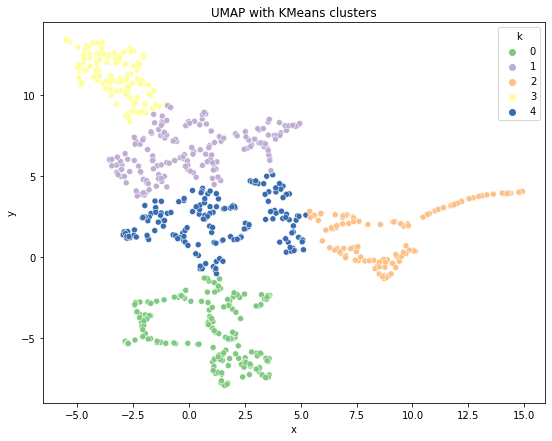

In [ ]:
k =KMeans(5)
k_pred = k.fit_predict(umap_df)
stonks["k"] =k_pred
umap_df['k'] = stonks.reset_index()['k']

db = DBSCAN(eps=1.42, min_samples=10)
dbc = db.fit_predict(umap_df)
umap_df['dbc']= dbc

In [ ]:
plt.figure(figsize=(9, 7))
plt.title("UMAP with KMeans clusters")
sns.scatterplot(x="x", y="y", hue= 'k', data= umap_df, palette="Accent")
plt.show()

In [ ]:
plt.figure(figsize=(9, 7))
plt.title("UMAP with DBSCAN clusters")
sns.scatterplot(x="x", y="y", hue= 'dbc', data= umap_df, palette="Accent")
plt.show()

## TSNE

In [ ]:
# two step process - use PCA to reduce, then tsne for embeddings (2d)
# to keep things simple, just random choice for 90%, this could be 80%, or 95%

pca_tsne = PCA(.85)
pcs_tsne = pca_tsne.fit_transform(stonks_scaled)

pcs_tsne.shape

(754, 17)

In [ ]:
tsne = TSNE(perplexity=50.0,n_iter=5000, init='pca', random_state= 820)
tsne.fit(pcs_tsne)

TSNE(angle=0.5, early_exaggeration=12.0, init='pca', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=5000, n_iter_without_progress=300, n_jobs=None,
     perplexity=50.0, random_state=820, verbose=0)

In [ ]:
te = tsne.embedding_
tdata = pd.DataFrame(te, columns=["e1", "e2"])

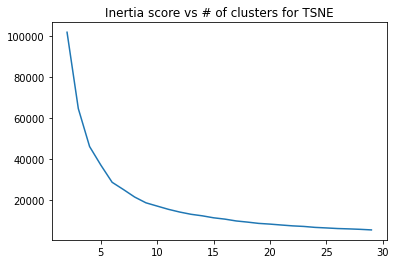

In [ ]:
ss= []
for k in range(2,30):
    km = KMeans(n_clusters=k)
    lab_sc = km.fit_predict(tdata)
    ss.append(km.inertia_)


plt.title("Inertia score vs # of clusters for TSNE")
sns.lineplot(x=range(2,30), y=ss)
plt.show()


In [ ]:
db = DBSCAN(eps=2.45, min_samples=10)
dbc = db.fit_predict(tdata)
tdata['dbc']= dbc


k =KMeans(6)
k_pred = k.fit_predict(tdata)
stonks["k"] =k_pred
tdata['k'] = stonks.reset_index()['k']


In [ ]:
plt.figure(figsize=(9, 7))
plt.title("TSNE with KMeans clusters")
sns.scatterplot(x="e1", y="e2", hue="k", data=tdata, palette= "Accent_r" )

In [ ]:
plt.figure(figsize=(9, 7))
plt.title("TSNE with DBSCAN clusters")
sns.scatterplot(x="e1", y="e2", hue="dbc", data=tdata, palette= "Accent_r" )